<a href="https://colab.research.google.com/github/Sunita02Kumari/spam_hum_mail_prediction/blob/main/Spam_mail_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing the Dependencies

In [ ]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

# Data Collection & Pre-Processing

In [ ]:
# loading the data from csv file to a pandas Dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mail_data.csv')
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
# replace the null values with a null string
df = df.where((pd.notnull(df)),'')
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
# checking the number of rows and columns in the dataframe
df.shape

(5572, 2)

In [ ]:
X = df.Message
X.head(10)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: Message, dtype: object

In [ ]:
y = df.Category
y.head(10)

0     ham
1     ham
2    spam
3     ham
4     ham
5    spam
6     ham
7     ham
8    spam
9    spam
Name: Category, dtype: object

# Splitting the data into training data & test data

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
len(X)

5572

In [ ]:
len(X_train)

4179

In [ ]:
len(X_test)

1393

# Conversion of text data into numerical data by using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
V = CountVectorizer()
X_train_count = V.fit_transform(X_train)
X_train_count.toarray()[ :3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

 # Using Multinomial Naive Bayes Model

In [ ]:
# training the MultinomialNB model with the training data
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

# Evaluating the trained model

In [ ]:
# prediction on training data
model.predict(X_train_count)

array(['spam', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [ ]:
model.score(X_train_count, y_train)

0.9930605407992342

In [ ]:
# prediction on test data
X_test_count = V.transform(X_test)
model.score(X_test_count, y_test)

0.9842067480258435

In [ ]:
model.predict(X_test_count)

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

# Building a Predictive System

In [ ]:
emails = [
    'Hey mohan can we get together to watch football game tomorrow',
    'upto 20% discount on parking, exclusive offer just for your. Dont miss this reward!'
]

emails_count = V.transform(emails)
model.predict(emails_count)

array(['ham', 'spam'], dtype='<U4')

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_count)

cm = confusion_matrix(y_test,y_pred)

Text(42.0, 0.5, 'Truth')

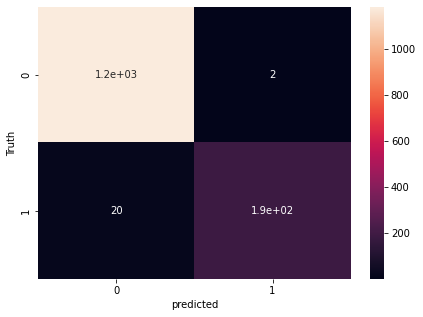

In [ ]:
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")